In [1]:
import numpy
import pandas as pd
import uproot
import matplotlib
import matplotlib.pyplot as plt
import awkward as ak
import hist
import numpy as np
from event_display import gdml_read_ecal_info
import os

%matplotlib inline
matplotlib.rc("figure", dpi=200)

dir_path = os.path.dirname(os.path.realpath("__file__"))
print(f"Believed path is: {dir_path}")

Believed path is: /home/romanov/eic/eic_ai_pid/data/simulation


In [2]:
container = numpy.load("../spot_gun_pions_0-12GeV_1000ev.npz")

In [3]:
for key in container:
    print(key)
#data = [container[key] for key in container]

modules
true_e
true_x
true_y
true_pdg


In [4]:
modules = container["modules"]
true_e = container["true_e"]

In [5]:
modules.shape

(1000, 3721)

In [6]:
sums = modules.sum(axis=1)
pd.DataFrame({"sums":sums, "true_e":true_e})

,sums,true_e
0,5.579192,10.432738
1,2.523633,7.710862
2,0.235165,5.356356
3,0.189046,0.633974
4,0.238658,11.738501
...,...,...
995,1.059049,4.506336
996,0.244101,1.444595
997,0.298402,0.555504
998,2.612620,6.050884


In [7]:
np.sqrt(3721)

61.0

In [8]:
data = np.reshape(modules, (len(modules), 61, 61))
cropped = data[:, 31-6:31+6, 45-6:45+6]
print(cropped[0])

[[2.96391605e-04 4.99521289e-03 2.80272914e-04 4.28677583e-03
  6.38725189e-03 9.05452948e-03 2.03842623e-03 3.27598979e-03
  1.44687883e-05 5.33395832e-05 0.00000000e+00 0.00000000e+00]
 [1.95724965e-06 1.22314761e-03 4.90982144e-04 6.11559348e-03
  7.95827340e-03 1.21829296e-02 5.47168357e-03 1.78141985e-03
  7.47608915e-02 1.23545333e-05 1.67597718e-05 0.00000000e+00]
 [2.37737258e-05 3.51793878e-03 1.47998082e-02 2.49509998e-02
  9.21665505e-02 2.05286350e-02 2.55793799e-02 4.43289131e-02
  4.04931605e-02 1.74353551e-03 0.00000000e+00 0.00000000e+00]
 [8.20566413e-07 3.18294857e-03 1.34340525e-02 1.64255187e-01
  2.33261392e-01 3.76606405e-01 1.86588049e-01 3.02850250e-02
  5.27068786e-03 7.35103231e-06 4.96235998e-06 0.00000000e+00]
 [1.32953208e-02 8.87828972e-03 2.31288783e-02 6.41668886e-02
  4.17233735e-01 1.81701565e+00 3.89505953e-01 2.25186925e-02
  2.66812462e-03 5.31669881e-04 7.91025650e-06 0.00000000e+00]
 [8.09154153e-05 3.87377548e-03 4.26731072e-02 6.17689602e-02
  1

In [9]:
sum = cropped.sum(axis=0)
sum

array([[ 0.21844312,  0.39627106,  0.58175539,  1.26280926,  1.62809972,
         1.31333955,  1.23162549,  1.41435019,  0.69236764,  0.73688497,
         0.50410251,  0.39500567],
       [ 0.35718885,  0.47242019,  0.80355376,  1.54824788,  3.1064331 ,
         3.62593338,  4.83630329,  3.03156446,  1.85371246,  1.53147078,
         1.0284739 ,  0.41952094],
       [ 0.66882422,  0.80388679,  1.80493341,  4.07663296,  7.01712444,
        15.01794648, 24.00294773, 10.87170885,  4.53194755,  2.05238417,
         0.96093551,  0.51379811],
       [ 0.78846067,  1.75585646,  3.54763773, 18.08158872, 24.97892781,
        38.47941453, 42.3613979 , 26.81680847, 12.78869445,  3.04426236,
         1.64483561,  1.24115577],
       [ 1.11367627,  2.08875802,  6.50832348, 22.87684051, 34.51008081,
        35.13124064, 37.68035117, 36.98248788, 19.24878367,  8.23390524,
         2.54372161,  1.40358084],
       [ 1.05807384,  2.26641425,  6.96332299, 28.05941446, 24.07840559,
        39.74700634, 3

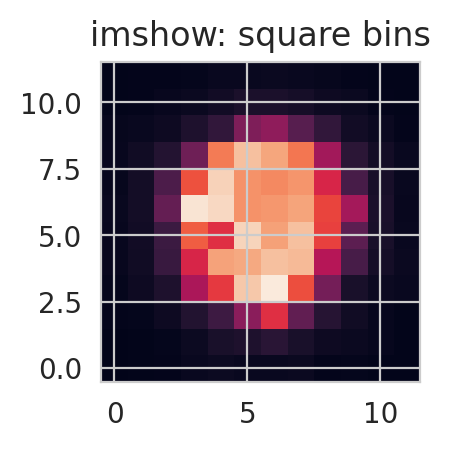

In [10]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(sum, interpolation='nearest', origin='lower')

In [11]:
# rng = np.random.default_rng()
# rng.shuffle(cropped, axis=0)
# sum2 = cropped.sum(axis=0)
#
# fig = plt.figure(figsize=(7, 3))
# ax = fig.add_subplot(131, title='imshow: square bins')
# plt.imshow(sum2, interpolation='nearest', origin='lower')

In [12]:
arr = np.arange(9).reshape((3, 3))
arr2 = np.arange(9).reshape((3, 3))

In [13]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = numpy.random.permutation(len(a))
    return a[p], b[p]

In [14]:
shuf_cr, shuf_e = unison_shuffled_copies(cropped, true_e)

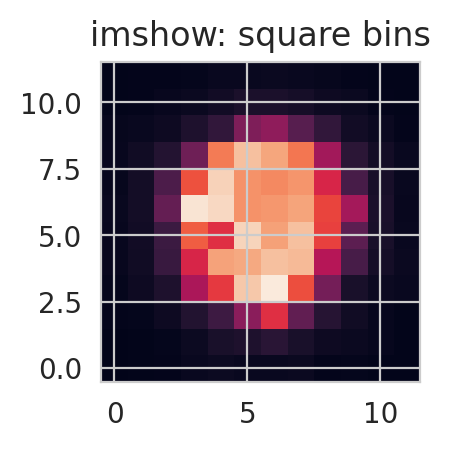

In [15]:
sum3 = shuf_cr.sum(axis=0)

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(sum3, interpolation='nearest', origin='lower')